# DAT210x - Programming with Python for DS

## Module5- Lab3

In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans

matplotlib.style.use('ggplot') # Look Pretty

A convenience function for you to use:

In [2]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [3]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()

    print("\n  Cluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

### CDRs

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) (CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records for 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!

Start by loading up the dataset and taking a peek at its `head` and `dtypes`. You can convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:

In [4]:
df=pd.read_csv('CDR.csv')
#print(df)
print(df.dtypes)

In             int64
Out            int64
Direction     object
CallDate      object
CallTime      object
DOW           object
Duration      object
TowerID       object
TowerLat     float64
TowerLon     float64
dtype: object


In [5]:
df.CallDate = pd.to_datetime(df.CallDate) # Converts the entries in the 'CallDate' column to datetime
df.CallTime = pd.to_timedelta(df.CallTime) # Converts the entries in the 'CallTime' column to timedelta
df.Duration = pd.to_timedelta(df.Duration) # Converts the entries in the 'Duration' column to timedelta
print(df.dtypes)

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration     timedelta64[ns]
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object


Create a unique list of the phone number values (people) stored in the `In` column of the dataset, and save them in a regular python list called `unique_numbers`. Manually check through `unique_numbers` to ensure the order the numbers appear is the same order they (uniquely) appear in your dataset:

In [6]:
in_numbers = df.In.unique() #distinct == unique
#print(in_numbers)

print(type(in_numbers)) #numpy.ndarray

<class 'numpy.ndarray'>


Using some domain expertise, your intuition should direct you to know that people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

In [7]:
print("Examining person: ", 0)

Examining person:  0


Create a slice called `user1` that filters to only include dataset records where the `In` feature (user phone number) is equal to the first number on your unique list above:

In [8]:
user1 = df[(df.In == in_numbers[0])]

print(user1)

               In         Out Direction   CallDate        CallTime  DOW  \
0      4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  Sat   
1      4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  Sat   
2      4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  Sat   
3      4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  Sat   
4      4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  Sat   
...           ...         ...       ...        ...             ...  ...   
53140  4638472273  2666307251    Missed 2013-02-26 11:26:01.888502  Tue   
53141  4638472273  2145623768    Missed 2013-02-26 17:32:18.776276  Tue   
53142  4638472273  4551601645  Incoming 2013-02-26 19:12:44.730636  Tue   
53143  4638472273  7721472178  Incoming 2013-02-26 07:50:41.435642  Tue   
53144  4638472273  6150928001  Incoming 2013-02-26 07:49:56.273334  Tue   

             Duration                               TowerID   TowerLat  \
0     00:02:41.741499  0d

Alter your slice so that it includes only Weekday (Mon-Fri) values:

In [9]:
user1 = user1[(user1.DOW == 'Mon') | (user1.DOW == 'Tue')| (user1.DOW == 'Wed')| (user1.DOW == 'Thu')
| (user1.DOW == 'Fri')]

print(user1)

               In         Out Direction   CallDate        CallTime  DOW  \
161    4638472273  5912117253    Missed 2010-12-27 18:41:14.639828  Mon   
194    4638472273  4217121115  Incoming 2010-12-28 21:36:14.190286  Tue   
195    4638472273  6022767590  Incoming 2010-12-28 19:57:19.501140  Tue   
196    4638472273  5621270003  Incoming 2010-12-28 17:10:15.465881  Tue   
197    4638472273  5481755331  Incoming 2010-12-28 16:20:11.532130  Tue   
...           ...         ...       ...        ...             ...  ...   
53140  4638472273  2666307251    Missed 2013-02-26 11:26:01.888502  Tue   
53141  4638472273  2145623768    Missed 2013-02-26 17:32:18.776276  Tue   
53142  4638472273  4551601645  Incoming 2013-02-26 19:12:44.730636  Tue   
53143  4638472273  7721472178  Incoming 2013-02-26 07:50:41.435642  Tue   
53144  4638472273  6150928001  Incoming 2013-02-26 07:49:56.273334  Tue   

             Duration                               TowerID   TowerLat  \
161   00:00:20.304073  09

The idea is that the call was placed before 5pm. From Midnight-730a, the user is probably sleeping and won't call / wake up to take a call. There should be a brief time in the morning during their commute to work, then they'll spend the entire day at work. So the assumption is that most of the time is spent either at work, or in 2nd, at home:

In [10]:
user1 = user1[(user1.CallTime < '17:00:00')]

print(user1)

print(len(user1))

               In         Out Direction   CallDate        CallTime  DOW  \
197    4638472273  5481755331  Incoming 2010-12-28 16:20:11.532130  Tue   
200    4638472273  8180005891  Incoming 2010-12-28 15:27:51.105337  Tue   
248    4638472273  8180005891    Missed 2010-12-29 09:13:35.198987  Wed   
249    4638472273  2145623768  Incoming 2010-12-29 06:02:11.319738  Wed   
250    4638472273  8068555700  Incoming 2010-12-29 13:54:14.724722  Wed   
...           ...         ...       ...        ...             ...  ...   
53091  4638472273  6150928001    Missed 2013-02-25 16:55:01.129212  Mon   
53138  4638472273  8068555700  Incoming 2013-02-26 07:28:38.486982  Tue   
53140  4638472273  2666307251    Missed 2013-02-26 11:26:01.888502  Tue   
53143  4638472273  7721472178  Incoming 2013-02-26 07:50:41.435642  Tue   
53144  4638472273  6150928001  Incoming 2013-02-26 07:49:56.273334  Tue   

             Duration                               TowerID   TowerLat  \
197   00:03:56.069765  95

Plot the Cell Towers the user connected to

Text(0.5, 1.0, 'Weekdays Calls (<5p.m)')

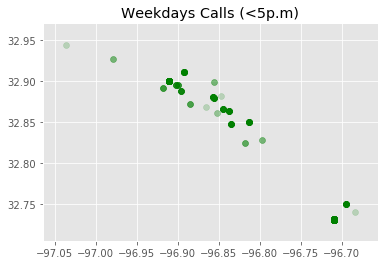

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekdays Calls (<5p.m)')

In [14]:
def doKMeans(data, num_clusters=0):
    # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
    # data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
    # no feature scaling is required. Print out the centroid locations and add them onto your scatter
    # plot. Use a distinguishable marker and color.
    #
    # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first). This is part
    # of your domain expertise. Also, *YOU* need to create, initialize (and return) the variable named
    # `model` here, which will be a SKLearn K-Means model for this to work:
    
    dataframe = pd.concat([data.TowerLon, data.TowerLat], axis = 1)
    kmeans = KMeans(n_clusters=clusters)
    labels = kmeans.fit_predict(dataframe)
    centroids = kmeans.cluster_centers_
    ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker='x', c='red', alpha=0.9, linewidths=3, s=250)
    model = kmeans
    return model
    


Let's tun K-Means with `K=3` or `K=4`. There really should only be a two areas of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another), then increase K=5, with the goal being that all centroids except two will sweep up the annoying outliers and not-home, not-work travel occasions. the other two will zero in on the user's approximate home location and work locations. Or rather the location of the cell tower closest to them.....

In [15]:
model = doKMeans(user1, 3)

NameError: name 'clusters' is not defined

Print out the mean `CallTime` value for the samples belonging to the cluster with the LEAST samples attached to it. If our logic is correct, the cluster with the MOST samples will be work. The cluster with the 2nd most samples will be home. And the `K=3` cluster with the least samples should be somewhere in between the two. What time, on average, is the user in between home and work, between the midnight and 5pm?

In [ ]:
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print("    Its Waypoint Time: ", midWaySamples.CallTime.mean())

Let's visualize the results! First draw the X's for the clusters:

In [ ]:
ax.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,0], s=169, c='r', marker='x', alpha=0.8, linewidths=2)
ax.set_title('Weekday Calls Centroids')
plt.show()